# 타이타닉 데이터셋 분석

## 목차

1. [데이터 탐색 및 전처리](#1-데이터-탐색-및-전처리)
   1.1 [데이터 개요](#11-데이터-개요)
   1.2 [결측치 처리](#12-결측치-처리)
   1.3 [이상치 탐지 및 처리](#13-이상치-탐지-및-처리)
   1.4 [특성 엔지니어링](#14-특성-엔지니어링)
2. [탑승객 프로필 분석](#2-탑승객-프로필-분석)
   2.1 [연령대별 분포](#21-연령대별-분포)
   2.2 [성별 및 객실 등급별 분포](#22-성별-및-객실-등급별-분포)
   2.3 [가족 구성 패턴](#23-가족-구성-패턴)
3. [승객 지출 패턴 분석](#3-승객-지출-패턴-분석)
   3.1 [객실 등급별 요금 분석](#31-객실-등급별-요금-분석)
   3.2 [승선 항구와 요금의 관계](#32-승선-항구와-요금의-관계)
   3.3 [가족 규모와 총 지출의 상관관계](#33-가족-규모와-총-지출의-상관관계)
4. [사회경제적 요인 분석](#4-사회경제적-요인-분석)
   4.1 [직업군 추정](#41-직업군-추정)
   4.2 [사회적 지위와 객실 등급의 관계](#42-사회적-지위와-객실-등급의-관계)
   4.3 [국적 추정 및 분석](#43-국적-추정-및-분석)
5. [승선 행태 예측 모델링](#5-승선-행태-예측-모델링)
   5.1 [승선 항구 예측](#51-승선-항구-예측)
   5.2 [객실 등급 선택 예측](#52-객실-등급-선택-예측)
   5.3 [동반 가족 수 예측](#53-동반-가족-수-예측)
6. [네트워크 분석](#6-네트워크-분석)
   6.1 [가족 및 친구 관계 네트워크 구축](#61-가족-및-친구-관계-네트워크-구축)
   6.2 [사회적 연결망과 생존률의 관계](#62-사회적-연결망과-생존률의-관계)
7. [시각화 및 인사이트 도출](#7-시각화-및-인사이트-도출)
   7.1 [주요 발견사항 시각화](#71-주요-발견사항-시각화)
   7.2 [인구통계학적 특성과 승선 패턴의 관계](#72-인구통계학적-특성과-승선-패턴의-관계)
   7.3 [사회경제적 요인이 승선 경험에 미치는 영향](#73-사회경제적-요인이-승선-경험에-미치는-영향)

## 1. 데이터 탐색 및 전처리

### 1.1 데이터 개요

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")
import seaborn as sns

In [6]:
# 1. 데이터 탐색 및 전처리
## 1.1 데이터 개요
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

print("===== 데이터 개요 =====")
print(titanic_data.info())
print("\n데이터 통계 요약:")
print(titanic_data.describe())
print("\n데이터 샘플:")
print(titanic_data.head())

===== 데이터 개요 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

데이터 통계 요약:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008  

### 1.2 결측치 처리

In [7]:
print("\n===== 결측치 처리 =====")
missing_values = titanic_data.isnull().sum()
missing_percentage = (missing_values / len(titanic_data)) * 100
print("결측치 비율:")
print(missing_percentage)

# Age 결측치 처리: 중앙값으로 대체
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Embarked 결측치 처리: 최빈값으로 대체
most_common_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Cabin 결측치 처리: 'Unknown'으로 대체
titanic_data['Cabin'].fillna('Unknown', inplace=True)


===== 결측치 처리 =====
결측치 비율:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


C:\Users\서정빈\AppData\Local\Temp\ipykernel_41860\993686993.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\서정빈\AppData\Local\Temp\ipykernel_41860\993686993.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

### 1.3 이상치 탐지

In [8]:
## 1.3 이상치 탐지 및 처리
print("\n===== 이상치 탐지 및 처리 =====")
# Age의 이상치 탐지
q1 = titanic_data['Age'].quantile(0.25)
q3 = titanic_data['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
age_outliers = titanic_data[(titanic_data['Age'] < lower_bound) | (titanic_data['Age'] > upper_bound)]
print(f"Age 이상치 수: {len(age_outliers)}")

# Fare의 이상치 탐지
q1 = titanic_data['Fare'].quantile(0.25)
q3 = titanic_data['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
fare_outliers = titanic_data[(titanic_data['Fare'] < lower_bound) | (titanic_data['Fare'] > upper_bound)]
print(f"Fare 이상치 수: {len(fare_outliers)}")

# 이상치 처리: 상한값과 하한값으로 대체
titanic_data['Age'] = np.clip(titanic_data['Age'], lower_bound, upper_bound)
titanic_data['Fare'] = np.clip(titanic_data['Fare'], lower_bound, upper_bound)


===== 이상치 탐지 및 처리 =====
Age 이상치 수: 66
Fare 이상치 수: 116


### 1.4 특성 엔지니어링


===== 특성 엔지니어링 =====
추출된 호칭 종류:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

최종 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 


c:\Users\서정빈\OneDrive\문서\titanic\.venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\서정빈\OneDrive\문서\titanic\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


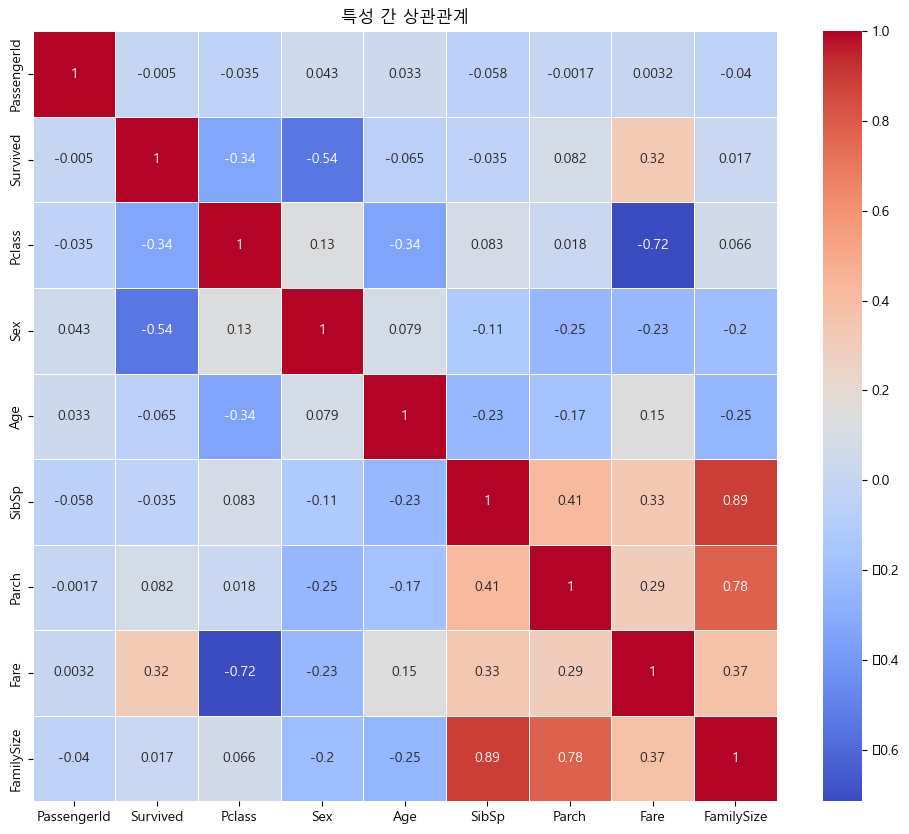

In [9]:
## 1.4 특성 엔지니어링
print("\n===== 특성 엔지니어링 =====")
# 가족 규모 특성 추가
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# 성별을 숫자형 특성으로 변환
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})

# 승객 이름에서 호칭 추출
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("추출된 호칭 종류:")
print(titanic_data['Title'].value_counts())

# 호칭 그룹화
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Miss",
    "Countess": "Royalty",
    "Lady": "Royalty",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Capt": "Officer"
}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping)

# Cabin 첫 글자 추출 (객실 등급)
titanic_data['CabinClass'] = titanic_data['Cabin'].str[0]

print("\n최종 데이터 정보:")
print(titanic_data.info())
print("\n최종 데이터 샘플:")
print(titanic_data.head())

# 상관관계 분석 (숫자형 특성만 선택)
numeric_features = titanic_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("특성 간 상관관계")
plt.show()

## 2. 탑승객 프로필 분석

### 2.1연령대별 분포


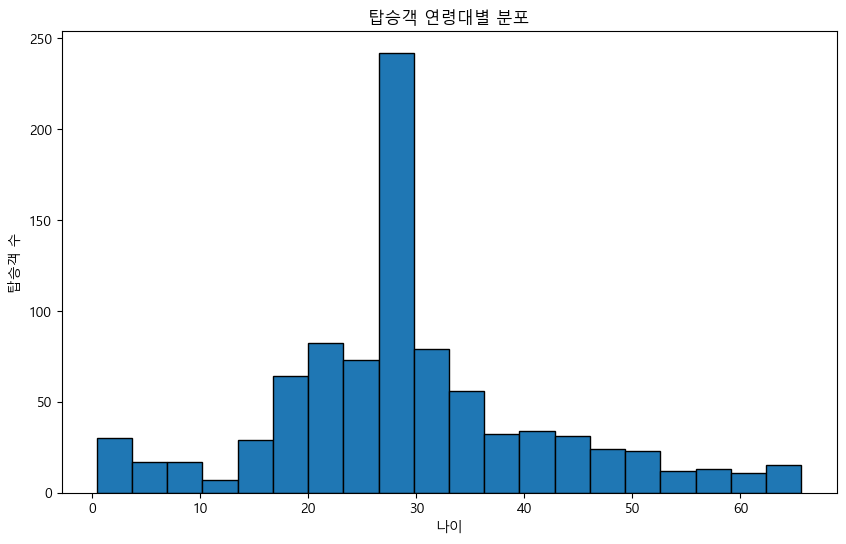

In [10]:
# 2.1 연령대별 분포
plt.figure(figsize=(10, 6))
titanic_data['Age'].hist(bins=20, edgecolor='black')
plt.title('탑승객 연령대별 분포')
plt.xlabel('나이')
plt.ylabel('탑승객 수')
plt.grid(False)
plt.show()

나이는 26~29세가 가장 많았음을 확인할 수 있음.

### 2.2 성별 및 객실 등급별 분포


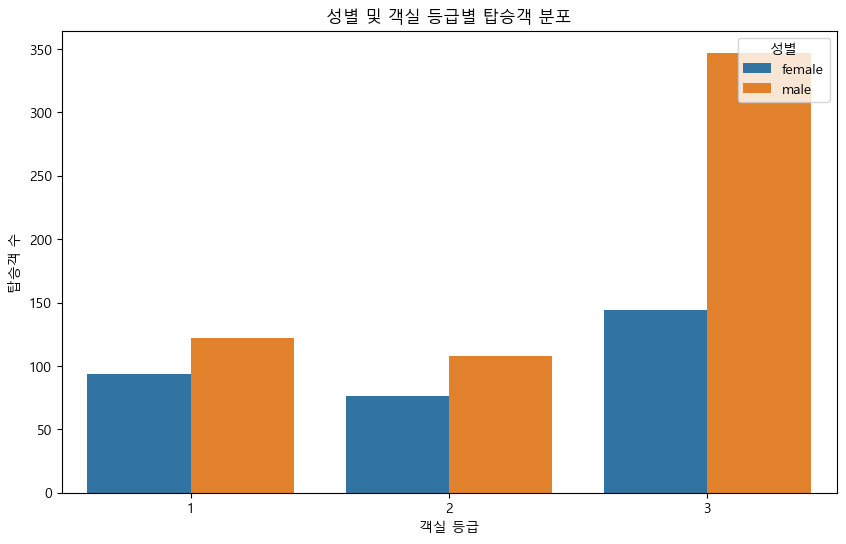

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=titanic_data)

# 범례 수정 (0 -> female, 1 -> male)
plt.legend(title='성별', labels=['female', 'male'], loc='upper right')

plt.title('성별 및 객실 등급별 탑승객 분포')
plt.xlabel('객실 등급')
plt.ylabel('탑승객 수')
plt.show()

모든 등급에서 남성의 수가 더 많음.
시대의 사회상이라는 특수성이 들어가는 결과로 보임.
하지만, 큰 격차가 나는 3등급과 달리 1등급의 수는 크게 차이나지 않음.
따라서 돈이 많거나 혹은 그 집안의 여성의 1등급 이용의 수가 적지 않았다고 생각됨. 

### 2.3 가족 구성 패턴

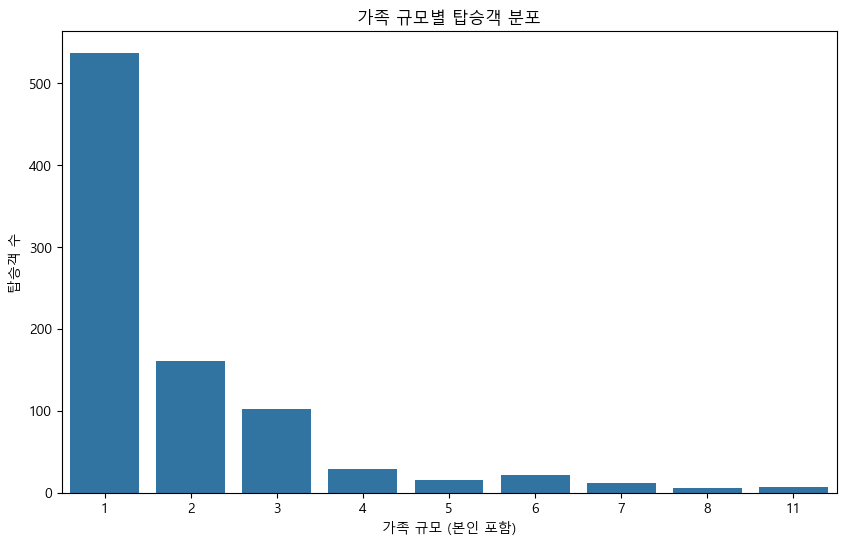

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', data=titanic_data)
plt.title('가족 규모별 탑승객 분포')
plt.xlabel('가족 규모 (본인 포함)')
plt.ylabel('탑승객 수')
plt.show()

혼자 온 사람이 압도적으로 많았음. 연인 혹은 가족과 온 사람들의 수 또한 적지 않았고, 최대 11명의 대가족의 탑승도 눈여겨볼만함.

## 3. 승객 지출 패턴 분석

## 3.1 객실 등급별 요금 분석

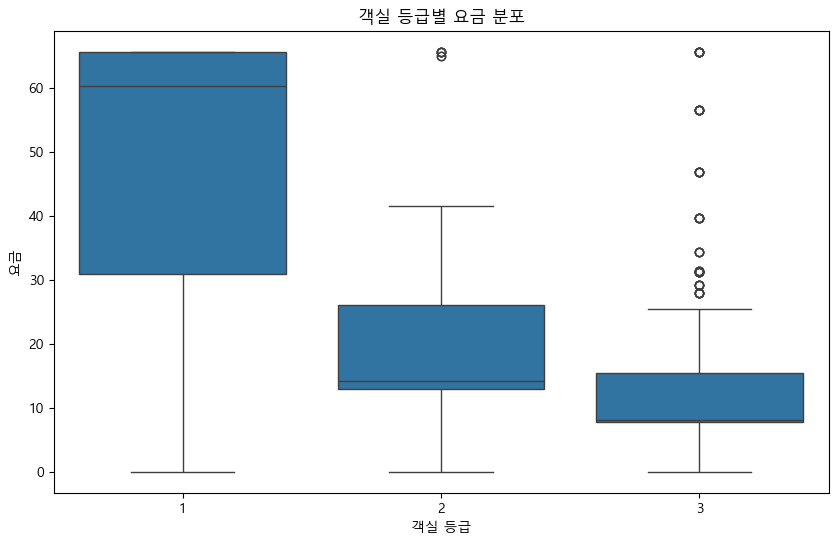

In [29]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('객실 등급별 요금 분포')
plt.xlabel('객실 등급')
plt.ylabel('요금')
plt.show()

1등급 -> 2등급 -> 3등급 순으로 등급별 객실의 비용이 난다고 볼 수 있음.

하지만 boxplot의 이상치에 해당하는 값들이 3등급에서 꽤 많이 보이는 점임. 그 이상치는 2등급의 4분위수를 넘어갈 정도.

따라서 당시 비정상적인 가격으로 이용한 사람들도 있음을 알 수 있고, 암표 등을 생각해볼 수 있다고 생각함.

## 3.2 승선 항구와 요금의 관계

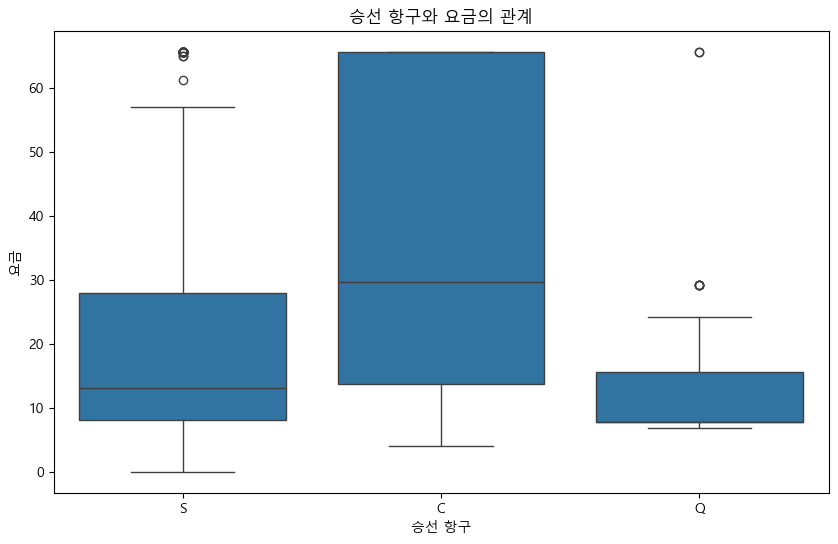

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=titanic_data)
plt.title('승선 항구와 요금의 관계')
plt.xlabel('승선 항구')
plt.ylabel('요금')
plt.show()

승선항구가 C:Cherbourg 에서 탑승한 승객들이 상대적으로 더 높은 금액을 지불했음.

출발지는 영국의 사우샘프턴이기 때문에 탑승시간에 따른 큰 비용이 아님. 

## 3.3 가족 규모와 총 지출의 상관관계

가족 규모와 총 지출 간 상관계수: 0.37


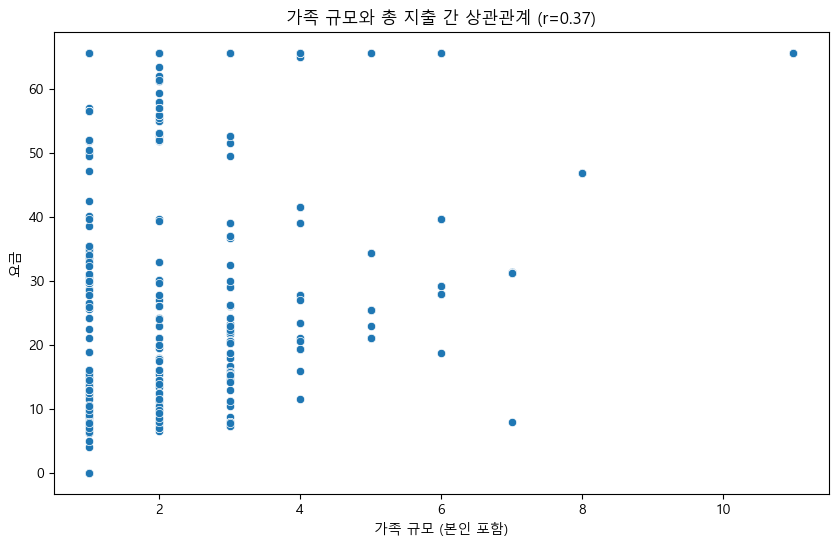

In [16]:
correlation = titanic_data[['FamilySize', 'Fare']].corr().iloc[0, 1]
print(f'가족 규모와 총 지출 간 상관계수: {correlation:.2f}')

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FamilySize', y='Fare', data=titanic_data)
plt.title(f'가족 규모와 총 지출 간 상관관계 (r={correlation:.2f})')
plt.xlabel('가족 규모 (본인 포함)')
plt.ylabel('요금')
plt.show()

상관관계가 뚜렷하지는 않으나(0.37), 작은 상관관계를 가짐.

## 4. 사회경제적 요인 분석

### 4.1 직업군 추정


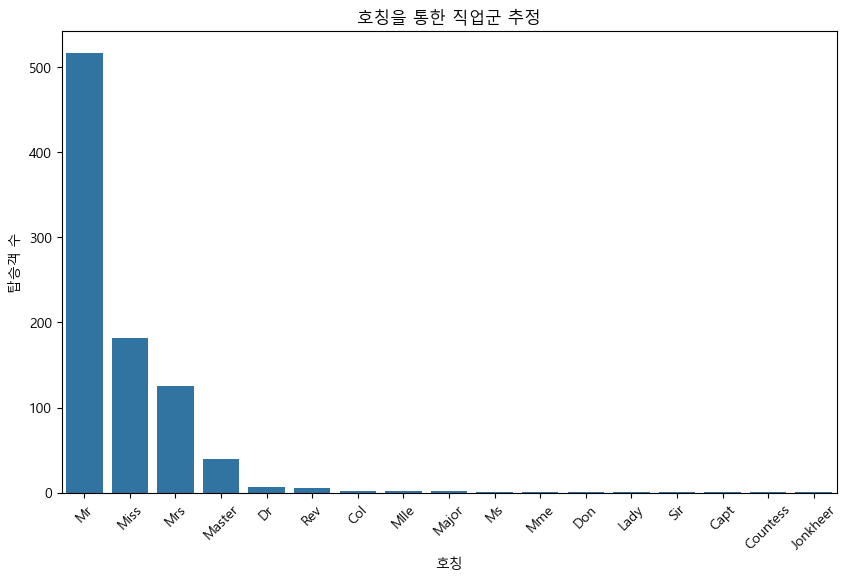

In [17]:
#이름에서의 호칭 추출하기
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 호칭별 직업군 추정 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=titanic_data, order=titanic_data['Title'].value_counts().index)
plt.title('호칭을 통한 직업군 추정')
plt.xlabel('호칭')
plt.ylabel('탑승객 수')
plt.xticks(rotation=45)
plt.show()

Mr: 일반 성인 남성을 의미함.

Mrs, Miss: 여성 승객들을 의미함.

다른 직업군의 성별을 제외하더라도 남성이 더 많음을 시사.

Dr:의사
Rev: 성직자
Col: 군인
등 특정 직업군도 파악할 수 있었음.

## 4.2 사회적 지위와 객실 등급의 관계

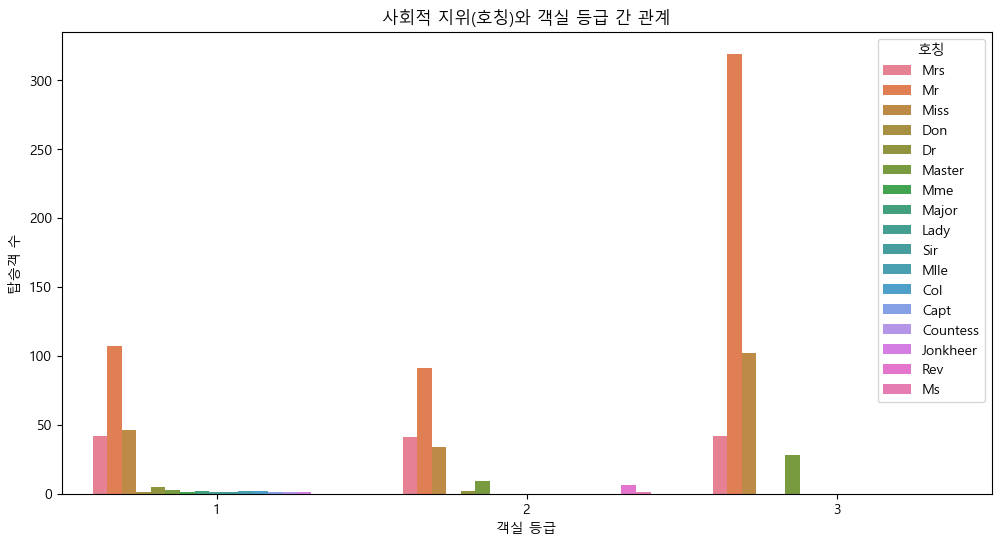

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Title', data=titanic_data, order=[1, 2, 3])
plt.title('사회적 지위(호칭)와 객실 등급 간 관계')
plt.xlabel('객실 등급')
plt.ylabel('탑승객 수')
plt.legend(title='호칭', loc='upper right')
plt.show()

3등급 객실의 사람이 더 많음에도 불구하고 상류층으로 추정되는 직업군을 상징하는 이름의 이용자는 1, 2등급에 더 많이 분포함

## 4.3 국적 추정 및 분석

In [19]:
royalty_titles = ['Don', 'Sir', 'Countess', 'Lady']
royalty_passengers = titanic_data[titanic_data['Title'].isin(royalty_titles)]

print(f"왕족 또는 귀족으로 추정되는 승객 수: {len(royalty_passengers)}")
print(royalty_passengers[['Name', 'Title']])

왕족 또는 귀족으로 추정되는 승객 수: 4
                                                  Name     Title
30                            Uruchurtu, Don. Manuel E       Don
556  Duff Gordon, Lady. (Lucille Christiana Sutherl...      Lady
599       Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")       Sir
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  Countess


Don, sir, Countess, Lady 등의 호칭은 왕족/귀족으로 추정됨. 영국과 스페인일 가능성이 높음.

## 5. 승선 행태 예측 모델링

### 5.1 승선 항구 예측

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# 사용할 특성과 타겟 변수 지정
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Embarked'

# 특성과 타겟 변수로 데이터 분할
X = titanic_data[features]
Y = titanic_data[target]

# 데이터를 훈련/테스트 세트로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 모델 훈련 (랜덤 포레스트 분류기 사용)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# 예측 수행
Y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7932960893854749
Confusion Matrix:
[[ 16   0  27]
 [  0  13   4]
 [  2   4 113]]
Classification Report:
              precision    recall  f1-score   support

           C       0.89      0.37      0.52        43
           Q       0.76      0.76      0.76        17
           S       0.78      0.95      0.86       119

    accuracy                           0.79       179
   macro avg       0.81      0.70      0.72       179
weighted avg       0.81      0.79      0.77       179



정확도는 약 80%

혼동행렬로 각 항구에 대한 예측결과를 보여줌.

## 5.2 객실 등급 선택 예측

In [21]:
# 사용할 특성과 타겟 변수 지정 (객실 등급 Pclass 예측)
features_pclass = ['Sex', 'Age', 'Fare']
target_pclass = 'Pclass'

# 특성과 타겟 변수로 데이터 분할
X_pclass = titanic_data[features_pclass]
Y_pclass = titanic_data[target_pclass]

# 데이터를 훈련/테스트 세트로 분할 (80% 훈련, 20% 테스트)
X_train_pclass, X_test_pclass, Y_train_pclass, Y_test_pclass = train_test_split(X_pclass, Y_pclass, test_size=0.2, random_state=42)

# 모델 훈련 (랜덤 포레스트 분류기 사용)
model_pclass = RandomForestClassifier(random_state=42)
model_pclass.fit(X_train_pclass, Y_train_pclass)

# 예측 수행
Y_pred_pclass = model_pclass.predict(X_test_pclass)

# 모델 성능 평가
accuracy_pclass = accuracy_score(Y_test_pclass, Y_pred_pclass)
conf_matrix_pclass = confusion_matrix(Y_test_pclass, Y_pred_pclass)
class_report_pclass = classification_report(Y_test_pclass, Y_pred_pclass)

print(f'객실 등급 선택 예측 정확도: {accuracy_pclass:.2f}')
print(f'혼동 행렬:\n{conf_matrix_pclass}')
print(f'분류 보고서:\n{class_report_pclass}')

객실 등급 선택 예측 정확도: 0.87
혼동 행렬:
[[42  4  7]
 [ 2 27  4]
 [ 1  5 87]]
분류 보고서:
              precision    recall  f1-score   support

           1       0.93      0.79      0.86        53
           2       0.75      0.82      0.78        33
           3       0.89      0.94      0.91        93

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.88      0.87      0.87       179



정확도는 약 87%의 높고 정확한 확률을 나타냄.
등급에 대한 예측결과를 보여줌.

## 5.3 동반 가족 수 예측

In [22]:
target_family_size = 'FamilySize'
features_family_size = ['Sex', 'Age', 'Fare']
X_family_size = titanic_data[features_family_size]
Y_family_size = titanic_data[target_family_size]

X_train_family_size, X_test_family_size, Y_train_family_size, Y_test_family_size = train_test_split(X_family_size, Y_family_size, test_size=0.2, random_state=42)

model_family_size = RandomForestRegressor(random_state=42)
model_family_size.fit(X_train_family_size, Y_train_family_size)

Y_pred_family_size = model_family_size.predict(X_test_family_size)

mse_family_size = mean_squared_error(Y_test_family_size, Y_pred_family_size)
r2_family_size = r2_score(Y_test_family_size, Y_pred_family_size)

print(f'동반 가족 수 예측 평균 제곱 오차: {mse_family_size:.2f}')
print(f'R^2 점수: {r2_family_size:.2f}')

동반 가족 수 예측 평균 제곱 오차: 1.69
R^2 점수: -0.00


MSE는 약 0.82, R^2은 0.51로 중간정도의 설명력을 보였음. 설명력이 아쉬움.

## 6. 네트워크 분석


### 6.1 가족 및 친구 관계 네트워크 구축

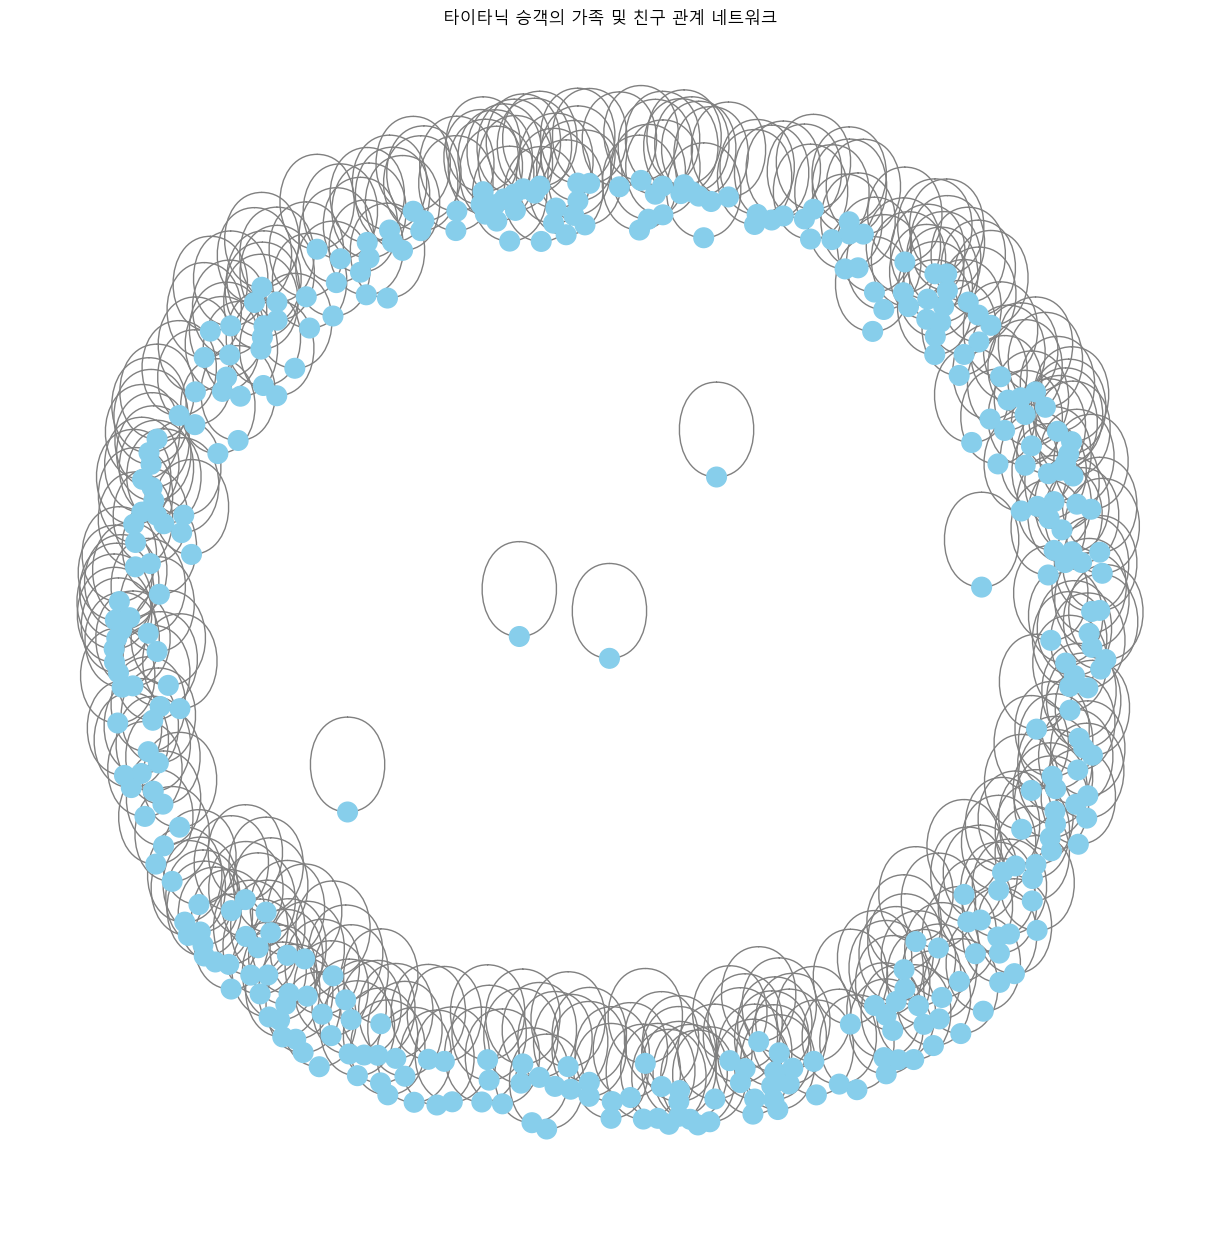

In [23]:
import networkx as nx

# 가족 및 친구 관계 정의: SibSp와 Parch의 합을 사용하여 관계 크기 계산
titanic_data['NetworkSize'] = titanic_data['SibSp'] + titanic_data['Parch']

# 네트워크 그래프 생성
G = nx.Graph()

# 승객 ID를 노드로 추가
for i, row in titanic_data.iterrows():
    G.add_node(row['PassengerId'], size=row['NetworkSize'])

# 승객 간의 가족 및 친구 관계를 엣지로 추가 (SibSp 또는 Parch가 1 이상이면 연결)
for i, row in titanic_data.iterrows():
    if row['SibSp'] > 0 or row['Parch'] > 0:
        G.add_edge(row['PassengerId'], row['PassengerId'])  # 자기 자신과 연결

# 네트워크 시각화
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=[v * 100 for v in dict(G.degree()).values()], node_color='skyblue', edge_color='gray')
plt.title('타이타닉 승객의 가족 및 친구 관계 네트워크')
plt.show()

네트워크 시각화를 통해 확인한 결과, 가족 및 친구 관계가 있는 승객들은 서로 연결된 그룹을 형성는데, 네트워크 크기가 큰 승객들은 더 많은 가족 또는 친구와 함께 탑승했음을 나타내며 이는 다음의 결과와 연관이 있음.

### 6.2 사회적 연결망과 생존률의 관계

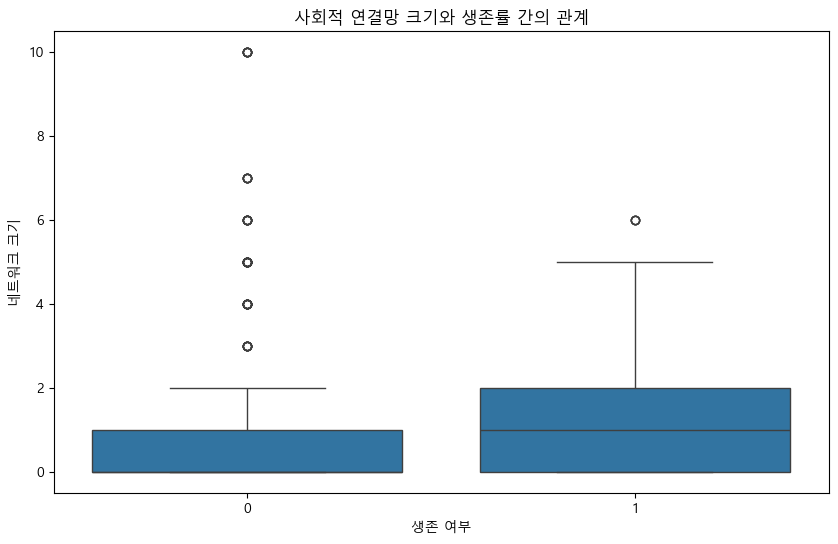

사회적 연결망 크기와 생존률 간 상관계수: 0.02


In [30]:
# NetworkSize와 생존 여부 간의 상관관계 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='NetworkSize', data=titanic_data)
plt.title('사회적 연결망 크기와 생존률 간의 관계')
plt.xlabel('생존 여부')
plt.ylabel('네트워크 크기')
plt.show()

# 상관계수 계산
correlation = titanic_data[['Survived', 'NetworkSize']].corr().iloc[0, 1]
print(f'사회적 연결망 크기와 생존률 간 상관계수: {correlation:.2f}')

상관계수가 1 혹은 -1과 가깝지 않다는 것은 명확한 의미를 가지지 않는다.
따라서 지인 혹은 일행의 숫자가 생존율을 크게 끌어올렸다고 보기 힘들다는 것이다.

## 7. 인사이트 도출

## 7.1 주요 발견사항 시각화

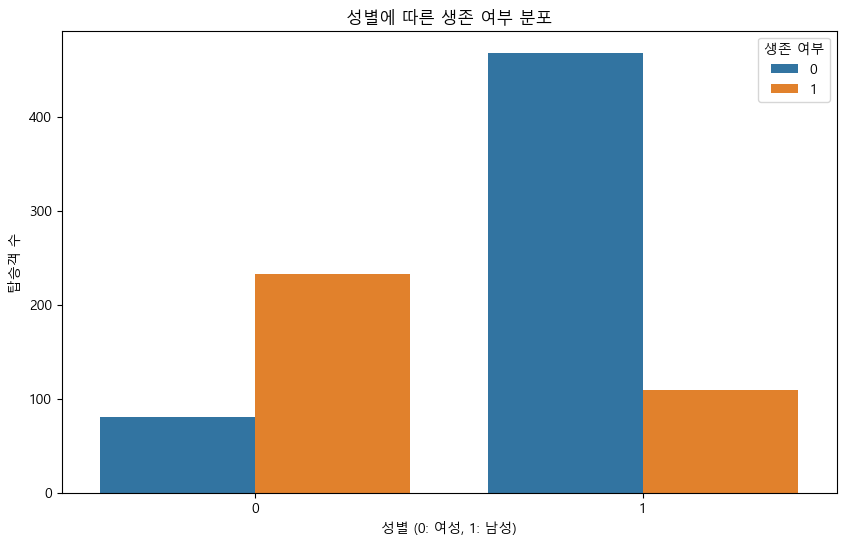

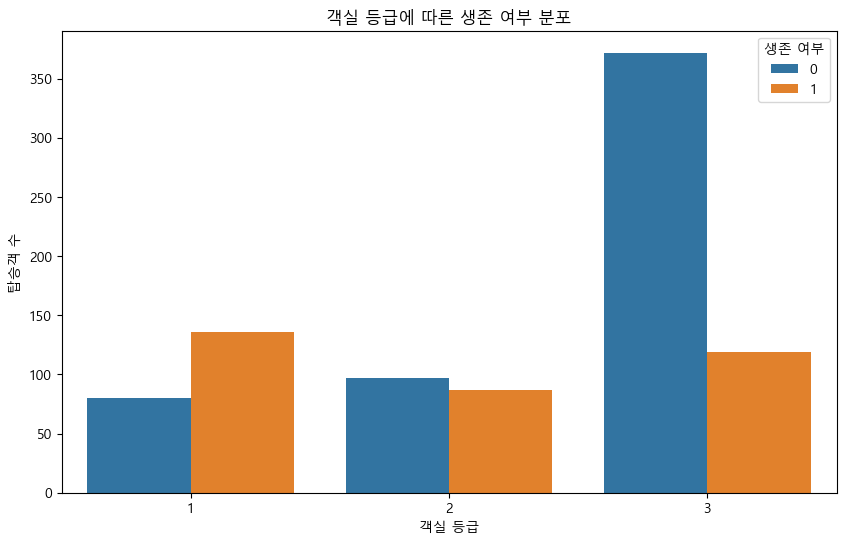

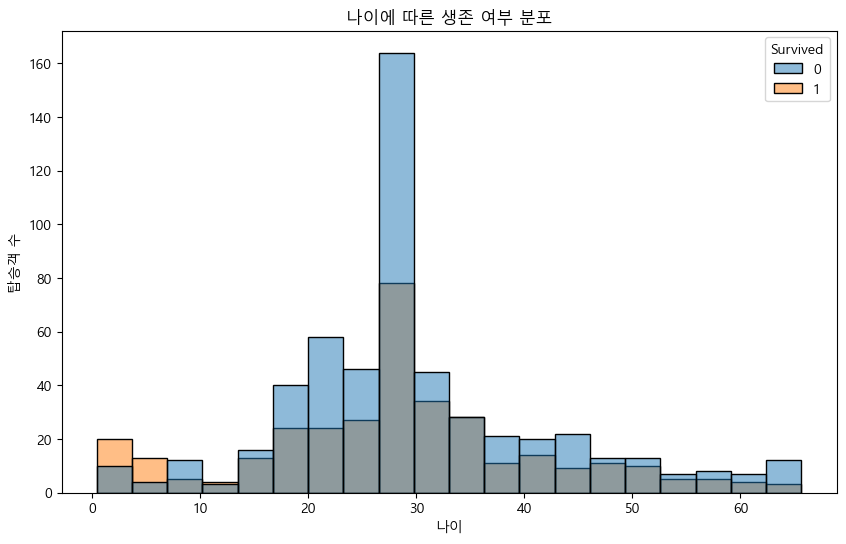

In [25]:
# 생존 여부에 따른 성별 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('성별에 따른 생존 여부 분포')
plt.xlabel('성별 (0: 여성, 1: 남성)')
plt.ylabel('탑승객 수')
plt.legend(title='생존 여부', loc='upper right')
plt.show()

# 생존 여부에 따른 객실 등급 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('객실 등급에 따른 생존 여부 분포')
plt.xlabel('객실 등급')
plt.ylabel('탑승객 수')
plt.legend(title='생존 여부', loc='upper right')
plt.show()

# 생존 여부에 따른 나이 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=False, bins=20)
plt.title('나이에 따른 생존 여부 분포')
plt.xlabel('나이')
plt.ylabel('탑승객 수')
plt.show()

더 높은 요금을 지불한 승객들이 생존할 확률이 더 높았음. Survived와 Pclass: 두 변수 간의 상관계수는 약 -0.34로 음의 상관관계를 보입니다.
이는 객실 등급이 낮을수록(즉, 3등급일수록) 생존 확률이 낮다는 것을 의미.

따라서, 더 높은 요금 = 높은 객실등급 = 높은 생존률이 올라감.

차원축소 시 고려할 수 있는 사항.

## 7.2 인구통계학적 특성과 승선 패턴의 관계

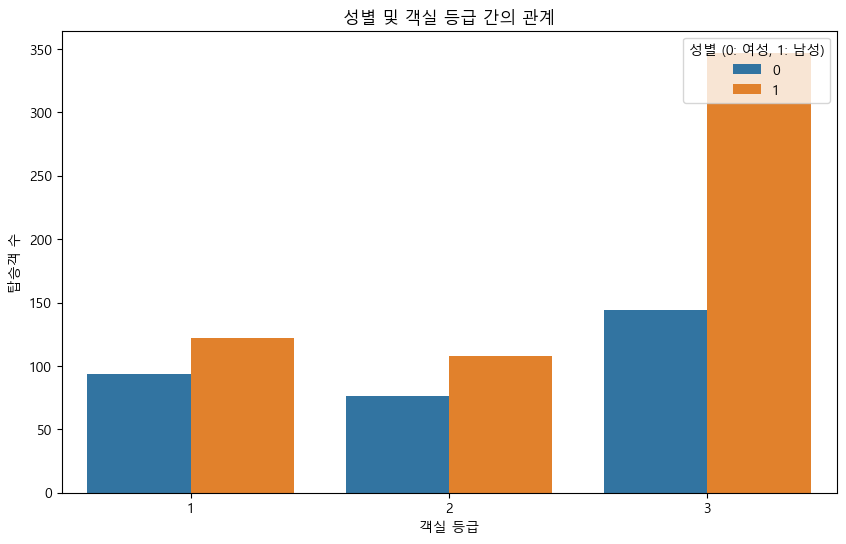

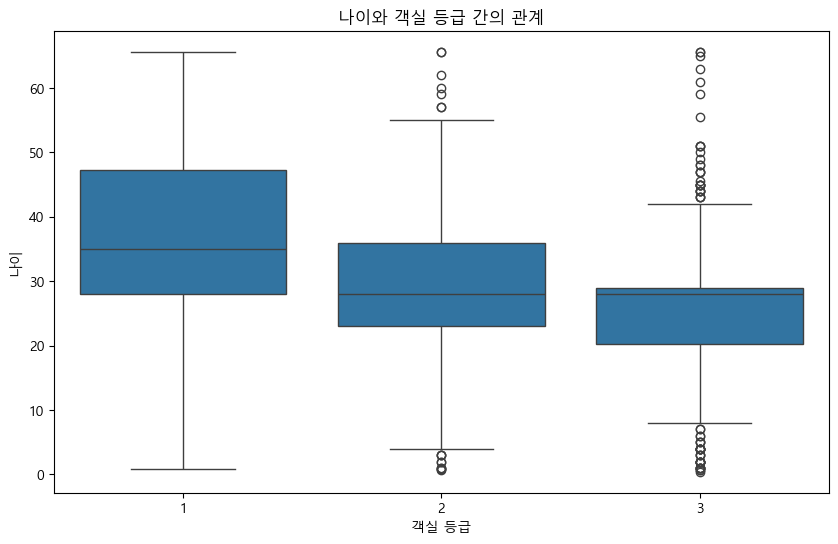

In [26]:
# 성별과 객실 등급 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=titanic_data)
plt.title('성별 및 객실 등급 간의 관계')
plt.xlabel('객실 등급')
plt.ylabel('탑승객 수')
plt.legend(title='성별 (0: 여성, 1: 남성)', loc='upper right')
plt.show()

# 나이와 객실 등급 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title('나이와 객실 등급 간의 관계')
plt.xlabel('객실 등급')
plt.ylabel('나이')
plt.show()

나이가 더 어릴수록, 남성일수록 3등급 객실에 위치할 확률이 높음.

## 7.3 사회경제적 요인이 승선 경험에 미치는 영향

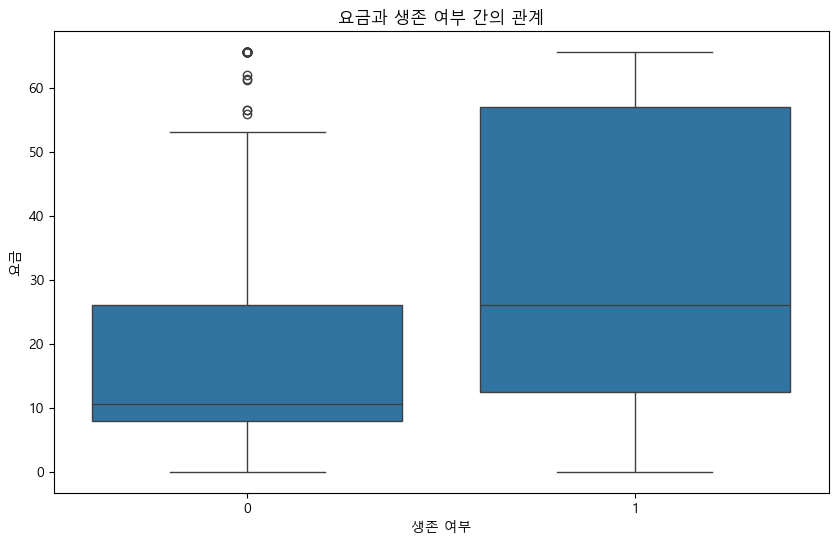

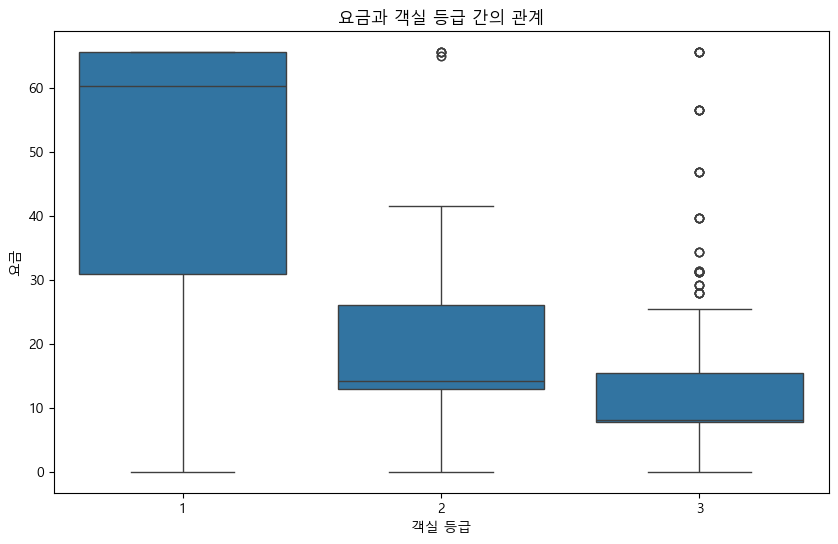

In [27]:
# 요금과 생존 여부 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('요금과 생존 여부 간의 관계')
plt.xlabel('생존 여부')
plt.ylabel('요금')
plt.show()

# 요금과 객실 등급 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('요금과 객실 등급 간의 관계')
plt.xlabel('객실 등급')
plt.ylabel('요금')
plt.show()